In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('D:\shopping_behavior_updated.csv')

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [61]:
#First, lets group ages into groups and insert new values in a new column

bins = [19, 25, 35, 45, float('inf')]
labels = ['19-24', '25-34', '35-45', '45+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,45+
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,19-24
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45+
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,19-24
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,45+


In [62]:
#Now, lets see gender and age split tables

gender_age_split = df.groupby(['Gender', 'Age Group']).size().reset_index(name='Count')

print(gender_age_split)

   Gender Age Group  Count
0  Female     19-24    132
1  Female     25-34    241
2  Female     35-45    232
3  Female       45+    623
4    Male     19-24    285
5    Male     25-34    514
6    Male     35-45    497
7    Male       45+   1307


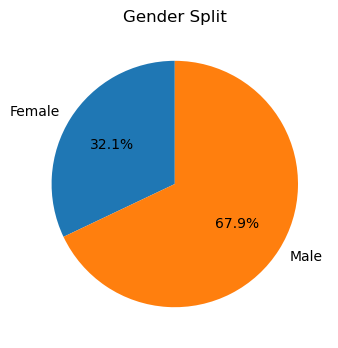

In [63]:
#For convenience, lets visualise our findings

#First, gender split data
gender_split = gender_age_split.groupby('Gender')['Count'].sum()
plt.figure(figsize=(8, 4))
plt.pie(gender_split, labels=gender_split.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Split')
plt.show()

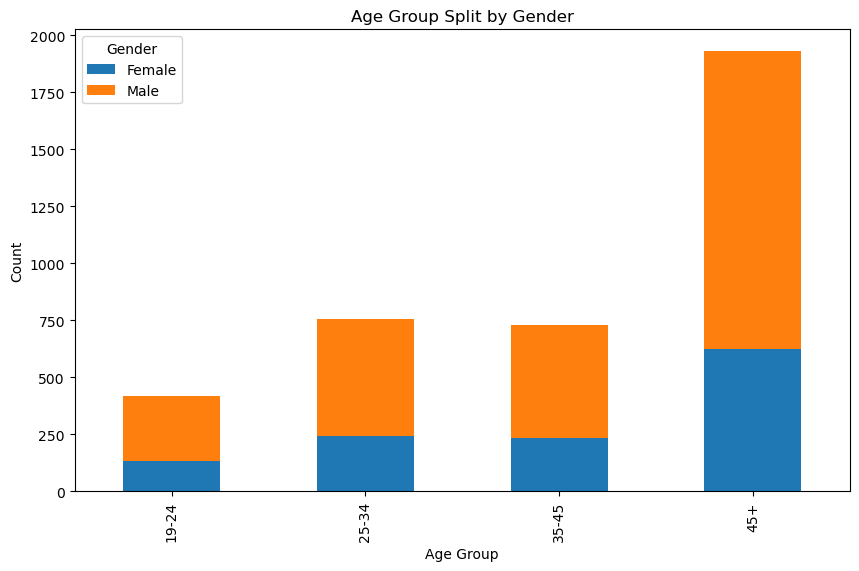

In [64]:
#Now, lets add age split to gender

age_group_split = gender_age_split.pivot(index='Age Group', columns='Gender', values='Count')
age_group_split.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Age Group Split by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [65]:
#Now i want to see in which location the most of purchases was made

purchases_per_location = df.groupby('Location')['Previous Purchases'].sum().reset_index()
purchases_per_location = purchases_per_location.sort_values(by='Previous Purchases', ascending=False)

print('Distribution of all purchases per State')
print(purchases_per_location)

Distribution of all purchases per State
          Location  Previous Purchases
12        Illinois                2447
0          Alabama                2443
25         Montana                2426
4       California                2327
22       Minnesota                2307
19        Maryland                2282
24        Missouri                2280
27          Nevada                2265
11           Idaho                2251
26        Nebraska                2154
3         Arkansas                2138
7         Delaware                2118
30      New Mexico                2109
31        New York                2109
44         Vermont                2091
16        Kentucky                2087
23     Mississippi                2081
13         Indiana                2040
37    Pennsylvania                2029
1           Alaska                2023
49         Wyoming                2005
41       Tennessee                1999
9          Georgia                1981
39  South Carolina      

In [66]:
#Now will try to visualise data. to do so, lets install some add libraries
!pip install Fiona
!pip install GDAL
!pip install RTree
!pip install Shapely
!pip install GeoPandas

  Using cached GDAL-3.8.3.tar.gz (802 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for GDAL
Failed to build GDAL
  Running setup.py install for GDAL: started
  Running setup.py install for GDAL: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [117 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\gdal.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\gdalnumeric.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\gdal_array.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\gnm.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\ogr.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\osr.py -> build\lib.win-amd64-cpython-39\osgeo
  copying osgeo\__init__.py -> build\lib.win-amd64-cpython-39\osgeo
  creating build\lib.win-amd64-cpython-39\osgeo_utils
  copying gdal-utils\osgeo_utils\gdal2tiles.py -> build\lib.win-amd64-cpython-39\osgeo_utils
  copying gdal-util

In [67]:
!pip install missingno

In [68]:
#importing some additional libraries (just in case)
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point
import missingno as msn

In [69]:
#uploading json file with data on states and their geometry

state = geopandas.read_file(r"D:\us-states.json")

In [70]:
#i will merge json and csv to unify geometry of states with states and purchases

merged = pd.merge(left = state,right = purchases_per_location, left_on = 'name', right_on = 'Location', how = 'left')
merged= merged.dropna()
merged

,id,name,density,geometry,Location,Previous Purchases
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,2443.0
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,2023.0
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,1844.0
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,2138.0
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,2327.0
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",Colorado,1798.0
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",Connecticut,1872.0
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",Delaware,2118.0
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",Florida,1777.0
10,13,Georgia,169.500,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",Georgia,1981.0


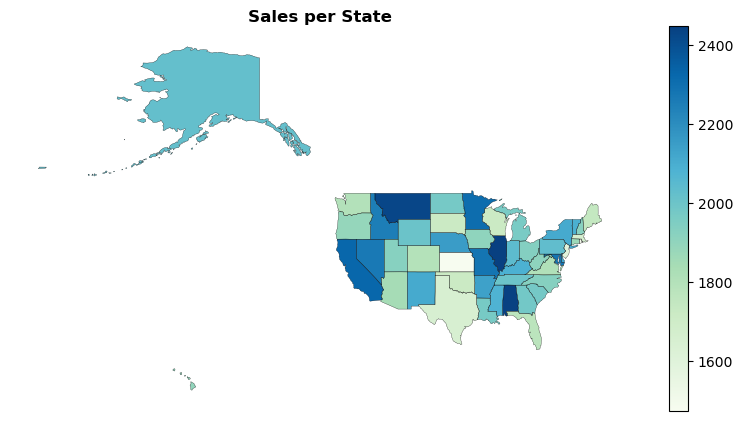

In [71]:
#now lets pray and visualise
ax = merged.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))  # creating the border
merged.plot(ax=ax, column='Previous Purchases', legend=True, cmap='GnBu')  # creating the map and fetch the sales column as its value, set the color and display the legend
ax.get_xaxis().set_visible(False)  # hide the x-axis value
ax.get_yaxis().set_visible(False)  # hide the y-axis value

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Sales per State', size=12, weight='bold')

plt.show()

In [72]:
#now i want to see what is the most liked category for each age group

favourite_categories = df.groupby(['Age Group', 'Category']).size().groupby('Age Group').idxmax()

favourite_categories

Age Group
19-24    (19-24, Clothing)
25-34    (25-34, Clothing)
35-45    (35-45, Clothing)
45+        (45+, Clothing)
dtype: object

In [73]:
#since it gave me nothing, lets see which age group brings the most previous purchases

purchases_by_age_group = df.groupby('Age Group')['Previous Purchases'].sum()
purchases_by_age_group = purchases_by_age_group.sort_values(ascending = False)

print('Data on # of all previous purchases made by each age group: ')
print(purchases_by_age_group)

Data on # of all previous purchases made by each age group: 
Age Group
45+      49624
25-34    18902
35-45    18572
19-24    10322
Name: Previous Purchases, dtype: int64


In [12]:
#i want to understand what is the percentage of orders/customers that didn't used promocode

all_rows = len(df)
no_promocodes_rows = len(df[df['Promo Code Used'] == 'No'])

no_promocodes_percentage = round((no_promocodes_rows / all_rows) * 100)

print('Percentage of orders placed without promocode: ')
print(no_promocodes_percentage)

Percentage of orders placed without promocode: 
57


In [13]:
#i want to see what's an average number of previous purchases made by each group: those who used promcode and didn't

promocode_dynamics = df.groupby('Promo Code Used', as_index=False)\
    .agg({'Previous Purchases': 'mean'}).round(0)

In [14]:
promocode_dynamics

,Promo Code Used,Previous Purchases
0,No,25.0
1,Yes,26.0


In [15]:
#let's see if the same dynamics is seen when it comes to discounts

discount_dynamics = df.groupby('Discount Applied', as_index=False)\
    .agg({'Previous Purchases': 'mean'}).round(0)

discount_dynamics

,Discount Applied,Previous Purchases
0,No,25.0
1,Yes,26.0
